In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq

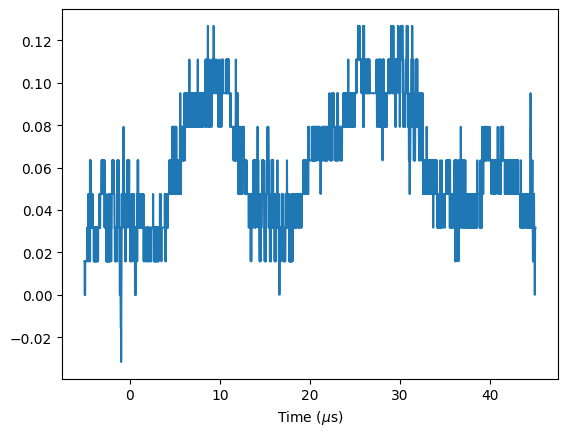

In [4]:
df = pd.read_csv("./20231110/20231110-noise/20231110-noise_0007.csv", skiprows=[1])
plt.xlabel(r"Time ($\mu$s)")
plt.plot(df["Time"], df["Channel B"])

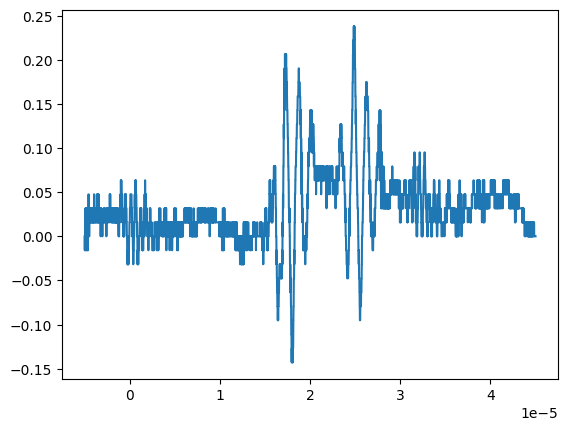

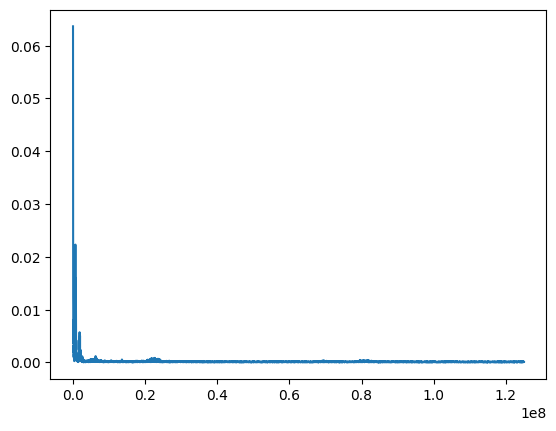

/opt/anaconda3/envs/py11/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


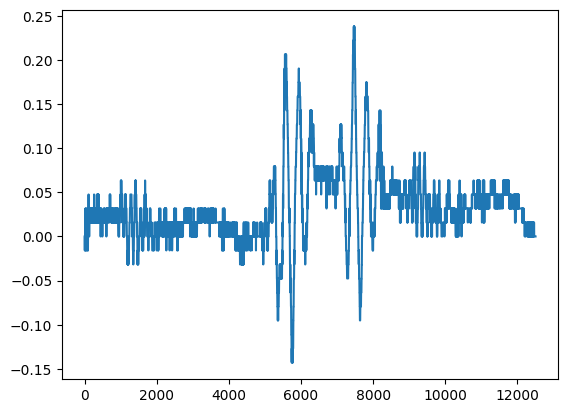

In [5]:
df = pd.read_csv("./20231110/20231110-noise/20231110-noise_0003.csv", skiprows=[1])
time = np.asarray(df["Time"]) * 1e-6  # convert to seconds
data = np.asarray(df["Channel B"])

# time = np.linspace(0, 10, 1000) #test
# data = np.sin(2*np.pi*time)

# FFT of data
N = len(data)
T = ((time[-1] - time[0])) / N
dfft = fft(data)

# PLOT
xf = fftfreq(N, T)[: N // 2]  # only used for correct scale when plotting
plt.plot(time, data)
plt.show()
plt.plot(xf, 2.0 / N * np.abs(dfft[0 : N // 2]))
plt.show()

data_ifft = ifft(dfft)
plt.plot(data_ifft)
plt.show()

noise_profile = dfft

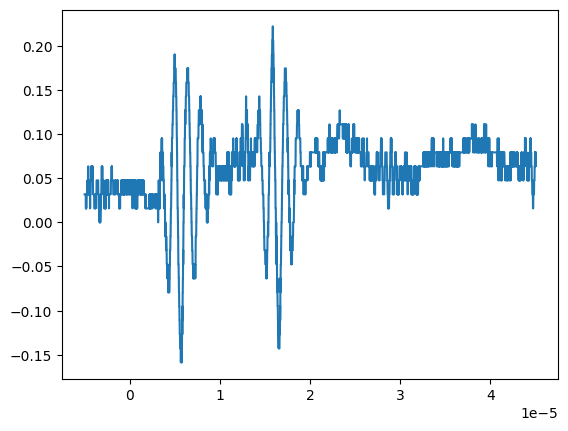

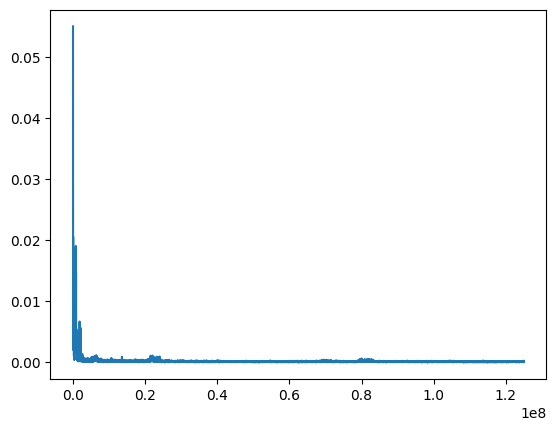

/opt/anaconda3/envs/py11/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


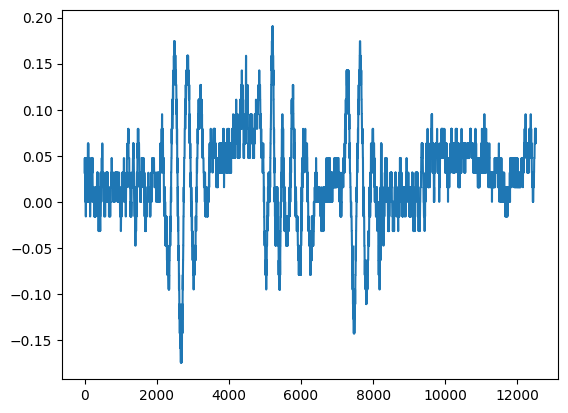

In [6]:
df = pd.read_csv("./20231110/20231110-noise/20231110-noise_0004.csv", skiprows=[1])
time = np.asarray(df["Time"]) * 1e-6  # convert to seconds
data = np.asarray(df["Channel B"])

# time = np.linspace(0, 10, 1000) #test
# data = np.sin(2*np.pi*time)

# FFT of data
N = len(data)
T = ((time[-1] - time[0])) / N
dfft = fft(data)

subt = dfft - noise_profile
# PLOT
xf = fftfreq(N, T)[: N // 2]  # only used for correct scale when plotting
plt.plot(time, data)
plt.show()
plt.plot(xf, 2.0 / N * np.abs(subt[0 : N // 2]))
plt.show()


data_ifft = ifft(subt)
plt.plot(data_ifft)
plt.show()

# noise_profile = dfft

In [16]:
def getFFT(n):
    df = pd.read_csv(
        f"./20231110/20231110-noise/20231110-noise_{n:04}.csv", skiprows=[1]
    )
    time = np.asarray(df["Time"]) * 1e-6  # convert to seconds
    data = np.asarray(df["Channel B"])

    # time = np.linspace(0, 10, 1000) #test
    # data = np.sin(2*np.pi*time)

    # FFT of data
    N = len(data)
    T = ((time[-1] - time[0])) / N
    dfft = fft(data)
    return time, dfft


def plotFFT(time, fft):
    N = len(time)
    T = ((time[-1] - time[0])) / N

    # PLOT
    xf = fftfreq(N, T)[: N // 2]  # only used for correct scale when plotting
    # plt.xscale("log")
    plt.yscale("log")
    plt.plot(xf, 2.0 / N * np.abs(fft[0 : N // 2]))
    plt.show()

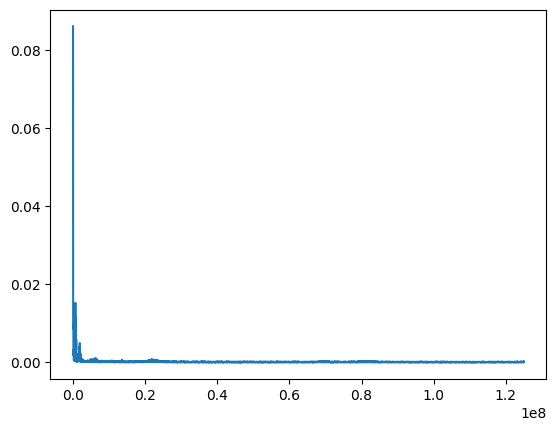

In [8]:
plotFFT(*getFFT(5))

In [9]:
fft_sum = getFFT(1)[1]
N = 1

for i in range(2, 1025):
    fft_sum += getFFT(i)[1]
    N += 1
fft_sum /= N

In [10]:
len(fft_sum)

12502

In [11]:
NOISE_FFT = fft_sum

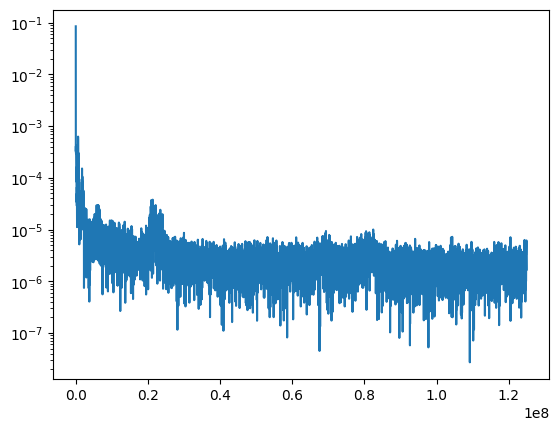

/opt/anaconda3/envs/py11/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


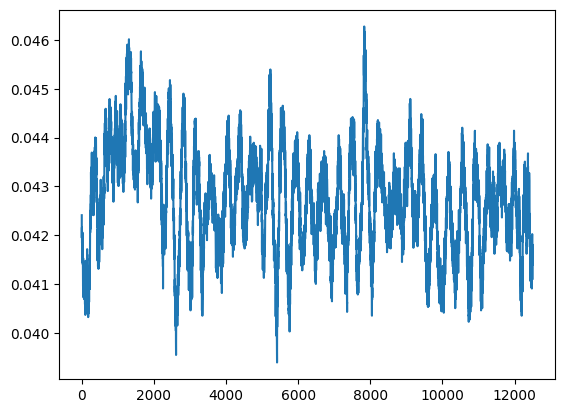

In [17]:
time = getFFT(1)[0]
plotFFT(time, fft_sum)

data_ifft = ifft(fft_sum)
plt.plot(data_ifft)

In [41]:
from scipy.signal import butter, lfilter, freqz, wiener


def butter_lowpass(cutoff, fs, order=5):
    return butter(order, cutoff, fs=fs, btype="low", analog=False)


def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

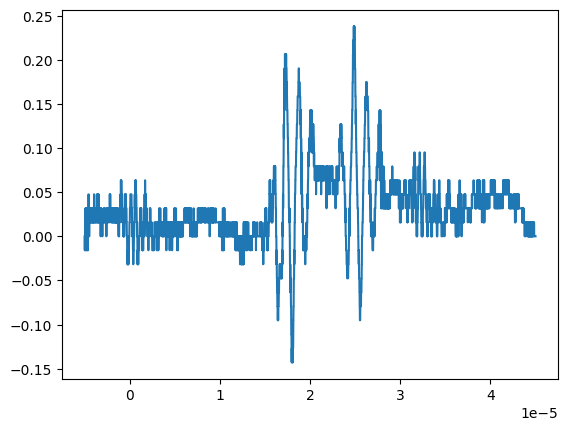

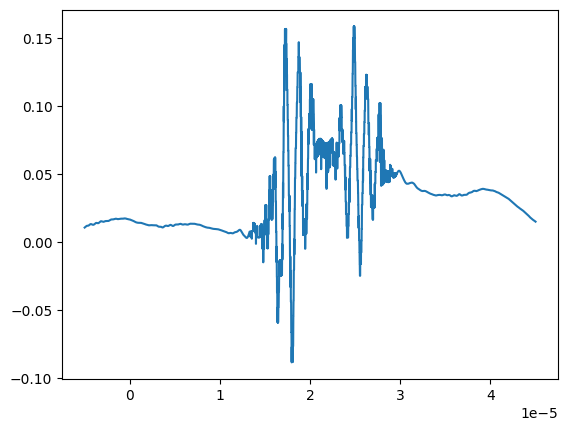

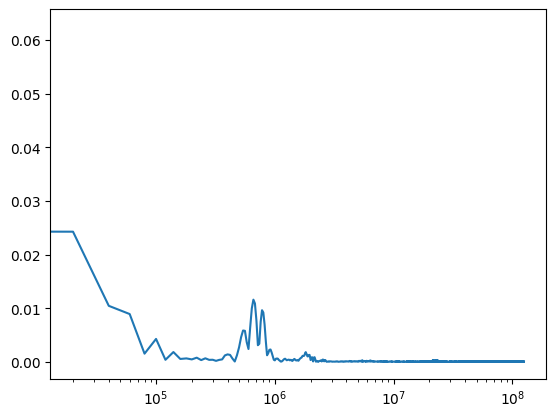

/opt/anaconda3/envs/py11/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


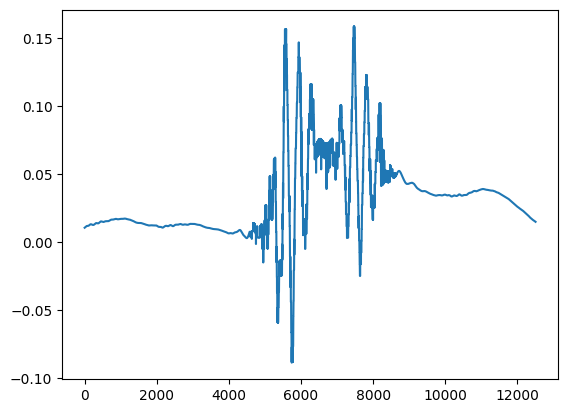

In [55]:
df = pd.read_csv("./20231110/20231110-noise/20231110-noise_0003.csv", skiprows=[1])
time = np.asarray(df["Time"]) * 1e-6  # convert to seconds
data = np.asarray(df["Channel B"])

# time = np.linspace(0, 10, 1000) #test
# data = np.sin(2*np.pi*time)

# FFT of data
N = len(data)
T = ((time[-1] - time[0])) / N
# data = butter_lowpass_filter(data, 10e5, 1/T)
plt.plot(time, data)
plt.show()
data = wiener(data, mysize=2000)


dfft = fft(data)

subt = dfft  # - NOISE_FFT
# PLOT
xf = fftfreq(N, T)[: N // 2]  # only used for correct scale when plotting
plt.plot(time, data)
plt.show()
plt.plot(xf, 2.0 / N * np.abs(subt[0 : N // 2]))
plt.xscale("log")

plt.show()


data_ifft = ifft(subt)


plt.plot(data_ifft)
plt.show()

# noise_profile = dfft

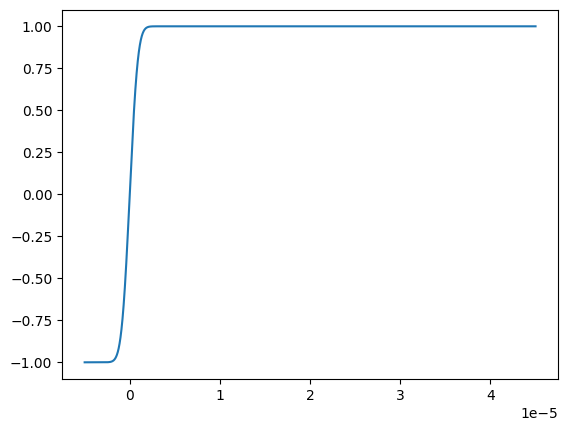

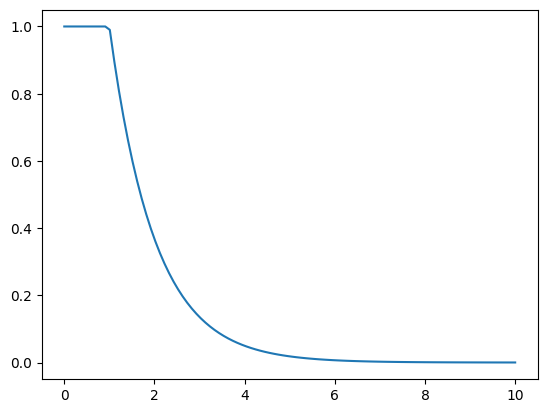

In [83]:
def expf(x):
    return np.piecewise(x, [x < 1, x >= 1], [1, lambda y: np.exp(-(y - 1))])


from scipy.special import erf

plt.plot(time, erf(1e6 * time))
plt.show()
plt.plot(np.linspace(0, 10, 100), expf(np.linspace(0, 10, 100)))

In [67]:
1e6 * time

array([-4.99799987, -4.99399987, -4.98999987, ..., 44.99799871,
       45.00199871, 45.00599871])

            Time  Channel A  Channel B  Channel C  average(C)  average(B)
0      -5.000000        0.0   0.063423   0.119033   -0.000550    0.041877
1      -4.996000        0.0   0.063423   0.119033    0.000812    0.041951
2      -4.992000        0.0   0.063423   0.079355   -0.000366    0.041710
3      -4.988000        0.0   0.063423   0.079355   -0.000576    0.041574
4      -4.984000        0.0   0.063423   0.079355   -0.000785    0.041668
...          ...        ...        ...        ...         ...         ...
12497  44.987999        0.0   0.079232   0.039678    0.004532    0.053000
12498  44.991999        0.0   0.079232   0.079355    0.005579    0.053052
12499  44.995999        0.0   0.079232   0.079355    0.005082    0.053157
12500  44.999999        0.0   0.079232   0.079355    0.005474    0.053221
12501  45.003999        0.0   0.063423   0.039678    0.004086    0.053022

[12502 rows x 6 columns]


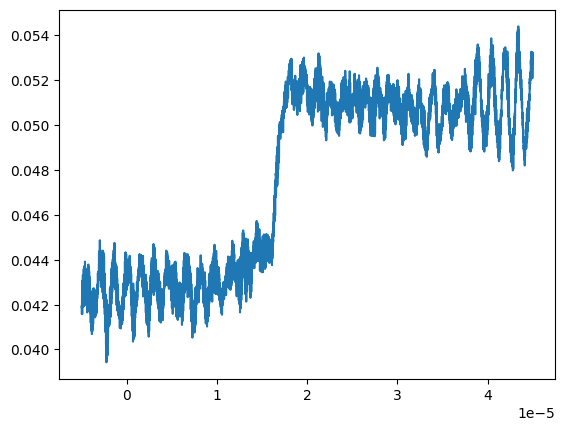

In [94]:
C = 1000
df = pd.read_csv(
    f"./20231110/20231110-L25-C{C}-G0-A100-anode/20231110-L25-C{C}-G0-A100-anode_1024.csv",
    skiprows=[1],
)
print(df)
time = np.asarray(df["Time"]) * 1e-6  # convert to seconds
data = np.asarray(df["average(B)"])
# data = butter_lowpass_filter(data, 1e6, )
plt.plot(time, data)

In [99]:
def getData(N):
    df = pd.read_csv(
        f"./20231110/20231110-L25-C{C}-G0-A100-anode/20231110-L25-C{C}-G0-A100-anode_{N :04}.csv",
        skiprows=[1],
    )
    print(df)
    time = np.asarray(df["Time"]) * 1e-6  # convert to seconds
    data = np.asarray(df["average(B)"])
    return time, data

            Time  Channel A  Channel B  Channel C  average(C)  average(B)
0      -4.998000        0.0   0.063423   0.039678   -0.000550    0.041877
1      -4.994000        0.0   0.079232   0.000000    0.000812    0.041951
2      -4.990000        0.0   0.063423   0.039678   -0.000366    0.041710
3      -4.986000        0.0   0.063423   0.039678   -0.000576    0.041574
4      -4.982000        0.0   0.063423   0.000000   -0.000785    0.041668
...          ...        ...        ...        ...         ...         ...
12497  44.989999        0.0   0.000000  -0.039678    0.004532    0.053000
12498  44.993999        0.0   0.031681  -0.079355    0.005579    0.053052
12499  44.997999        0.0   0.063423  -0.119033    0.005082    0.053157
12500  45.001999        0.0   0.095103  -0.119033    0.005474    0.053221
12501  45.005999        0.0   0.110974  -0.158711    0.004086    0.053022

[12502 rows x 6 columns]
            Time  Channel A  Channel B  Channel C  average(C)  average(B)
0      -5.00

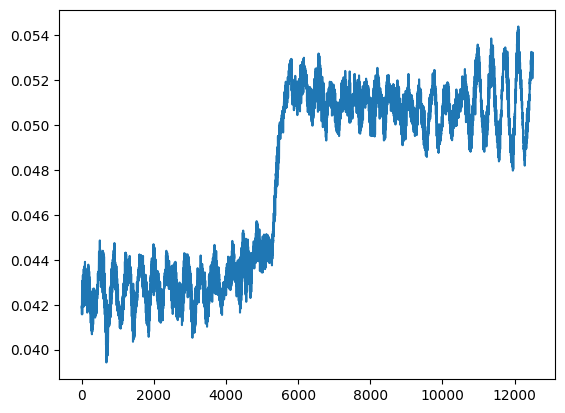

In [104]:
sum = getData(1)[1]
N = 1
for i in range(2, 1025):
    sum += getData(i)[1]
    N += 1
sum /= N
plt.plot(sum)

# Wiener filter on average

            Time  Channel A  Channel B  Channel C  average(C)  average(B)
0      -4.998000        0.0   0.063423   0.039678   -0.000550    0.041877
1      -4.994000        0.0   0.079232   0.000000    0.000812    0.041951
2      -4.990000        0.0   0.063423   0.039678   -0.000366    0.041710
3      -4.986000        0.0   0.063423   0.039678   -0.000576    0.041574
4      -4.982000        0.0   0.063423   0.000000   -0.000785    0.041668
...          ...        ...        ...        ...         ...         ...
12497  44.989999        0.0   0.000000  -0.039678    0.004532    0.053000
12498  44.993999        0.0   0.031681  -0.079355    0.005579    0.053052
12499  44.997999        0.0   0.063423  -0.119033    0.005082    0.053157
12500  45.001999        0.0   0.095103  -0.119033    0.005474    0.053221
12501  45.005999        0.0   0.110974  -0.158711    0.004086    0.053022

[12502 rows x 6 columns]


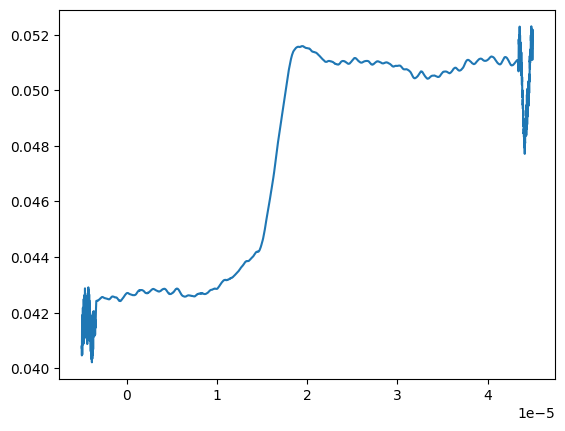

In [114]:
filtered = wiener(sum, mysize=800)
time = getData(1)[0]
plt.plot(time, filtered)

In [117]:
from scipy.signal import correlate

            Time  Channel A  Channel B  Channel C  average(C)  average(B)
0      -5.000000        0.0   0.095103   0.079355   -0.000550    0.041877
1      -4.996000        0.0   0.095103   0.079355    0.000812    0.041951
2      -4.992000        0.0   0.095103   0.079355   -0.000366    0.041710
3      -4.988000        0.0   0.095103   0.119033   -0.000576    0.041574
4      -4.984000        0.0   0.095103   0.119033   -0.000785    0.041668
...          ...        ...        ...        ...         ...         ...
12497  44.987999        0.0   0.047552   0.039678    0.004532    0.053000
12498  44.991999        0.0   0.047552   0.000000    0.005579    0.053052
12499  44.995999        0.0   0.047552   0.039678    0.005082    0.053157
12500  44.999999        0.0   0.047552   0.039678    0.005474    0.053221
12501  45.003999        0.0   0.047552   0.039678    0.004086    0.053022

[12502 rows x 6 columns]


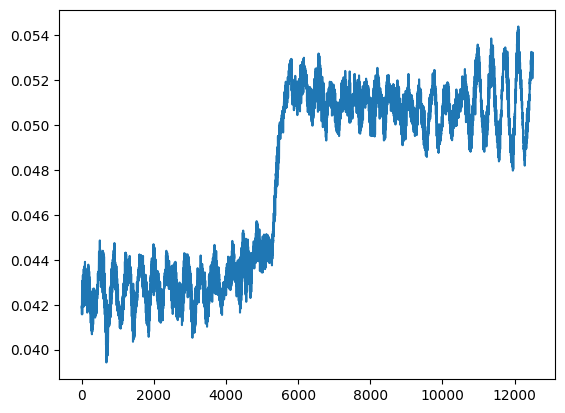

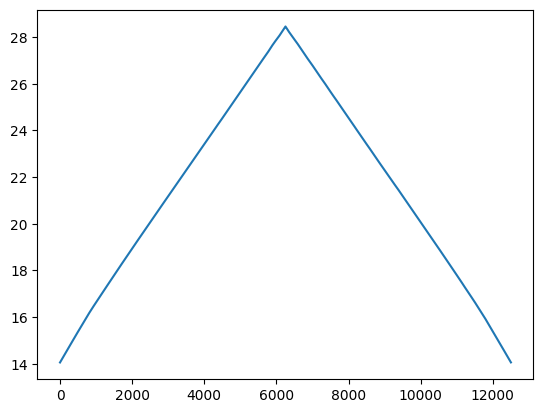

In [118]:
noisy = getData(6)[1]

plt.plot(noisy)
plt.show()

corr = correlate(noisy, sum, mode="same")
plt.plot(corr)